In [7]:
# Метод главных компонент 
# PCA ( principal component analysis) - алгоритм обучения БЕЗ учителя
# PCA - часто используют для понижения размерности 

In [9]:
# Задача машинного обучения БЕЗ учиеля состоит в выяснении зависимости между признаками 
# В PCA выполняется качественная оценка зависимости путем поиска главных осей координат и их использования
#для описания наборов данных
#

In [19]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

[[ 0.33232711  0.94316419]
 [ 0.94316419 -0.33232711]]
[0.24657408 0.01334837]
[1.326 4.26 ]


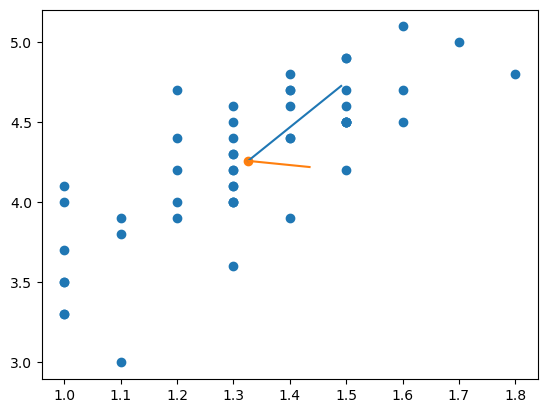

In [47]:
iris = sns.load_dataset("iris")

#sns.pairplot(iris, hue="species")
data = iris[["petal_width","petal_length", "species"]]

data_v = data[data["species"] == "versicolor"]

data_v = data_v.drop(columns=["species"])

#print(data_v)

X = data_v["petal_width"]
Y = data_v["petal_length"]

plt.scatter(X,Y)

p = PCA(n_components=2)
p.fit(data_v)

print(p.components_)
print(p.explained_variance_)
print(p.mean_)

plt.scatter(p.mean_[0], p.mean_[1])

plt.plot(
    [p.mean_[0],p.mean_[0] + p.components_[0][0] * np.sqrt(p.explained_variance_[0])],
    [p.mean_[1],p.mean_[1] + p.components_[0][1] * np.sqrt(p.explained_variance_[0])]
)

plt.plot(
    [p.mean_[0],p.mean_[0] + p.components_[1][0] * np.sqrt(p.explained_variance_[1])],
    [p.mean_[1],p.mean_[1] + p.components_[1][1] * np.sqrt(p.explained_variance_[1])]
)

plt.show()

(50, 2)
(50, 1)


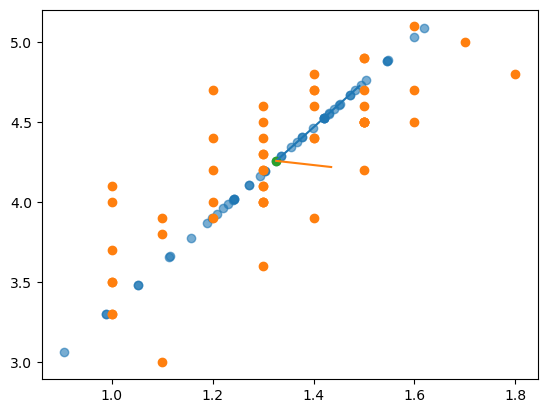

In [57]:
p1 = PCA(n_components=1)
p1.fit(data_v)

X_p = p1.transform(data_v)

print(data_v.shape)
print(X_p.shape)

X_p_new = p1.inverse_transform(X_p)

#print(X_p_new)

plt.scatter(X_p_new[:,0], X_p_new[:,1], alpha=0.6)

plt.scatter(X,Y)
plt.scatter(p.mean_[0], p.mean_[1])

plt.plot(
    [p.mean_[0],p.mean_[0] + p.components_[0][0] * np.sqrt(p.explained_variance_[0])],
    [p.mean_[1],p.mean_[1] + p.components_[0][1] * np.sqrt(p.explained_variance_[0])]
)

plt.plot(
    [p.mean_[0],p.mean_[0] + p.components_[1][0] * np.sqrt(p.explained_variance_[1])],
    [p.mean_[1],p.mean_[1] + p.components_[1][1] * np.sqrt(p.explained_variance_[1])]
)

plt.show()

In [ ]:
# + Простота интерпретации, эффективность в работе с многомерными данными
# - Аномальные значения в данных оказывают сильное влияние 
#
#